<a href="https://colab.research.google.com/github/Srishtiv2001/capstone/blob/codes/Classical_code_Non_GPU_(150_cities).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from pylab import rcParams

In [2]:
plt.style.use('dark_background')
rcParams['figure.figsize'] = 16, 10

In [3]:
np.random.seed(18)

size, cmin, cmax = 150, -100, 100
data = pd.DataFrame(dict(x=[0], y=[0])).append(
    pd.DataFrame((np.random.random_sample(2*size)*(cmax-cmin)+cmin).reshape(-1,2), columns=['x', 'y']), ignore_index=True)
data

<ipython-input-3-b7ea12eb0fcf>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = pd.DataFrame(dict(x=[0], y=[0])).append(


,x,y
0,0.000000,0.000000
1,30.074848,1.090675
2,75.720294,-63.631955
3,70.446614,50.027257
4,33.220333,97.579090
...,...,...
146,44.080113,-41.024718
147,-61.088577,2.871590
148,15.453097,21.393731
149,26.546590,68.767646


In [4]:
data2=data.values.tolist()

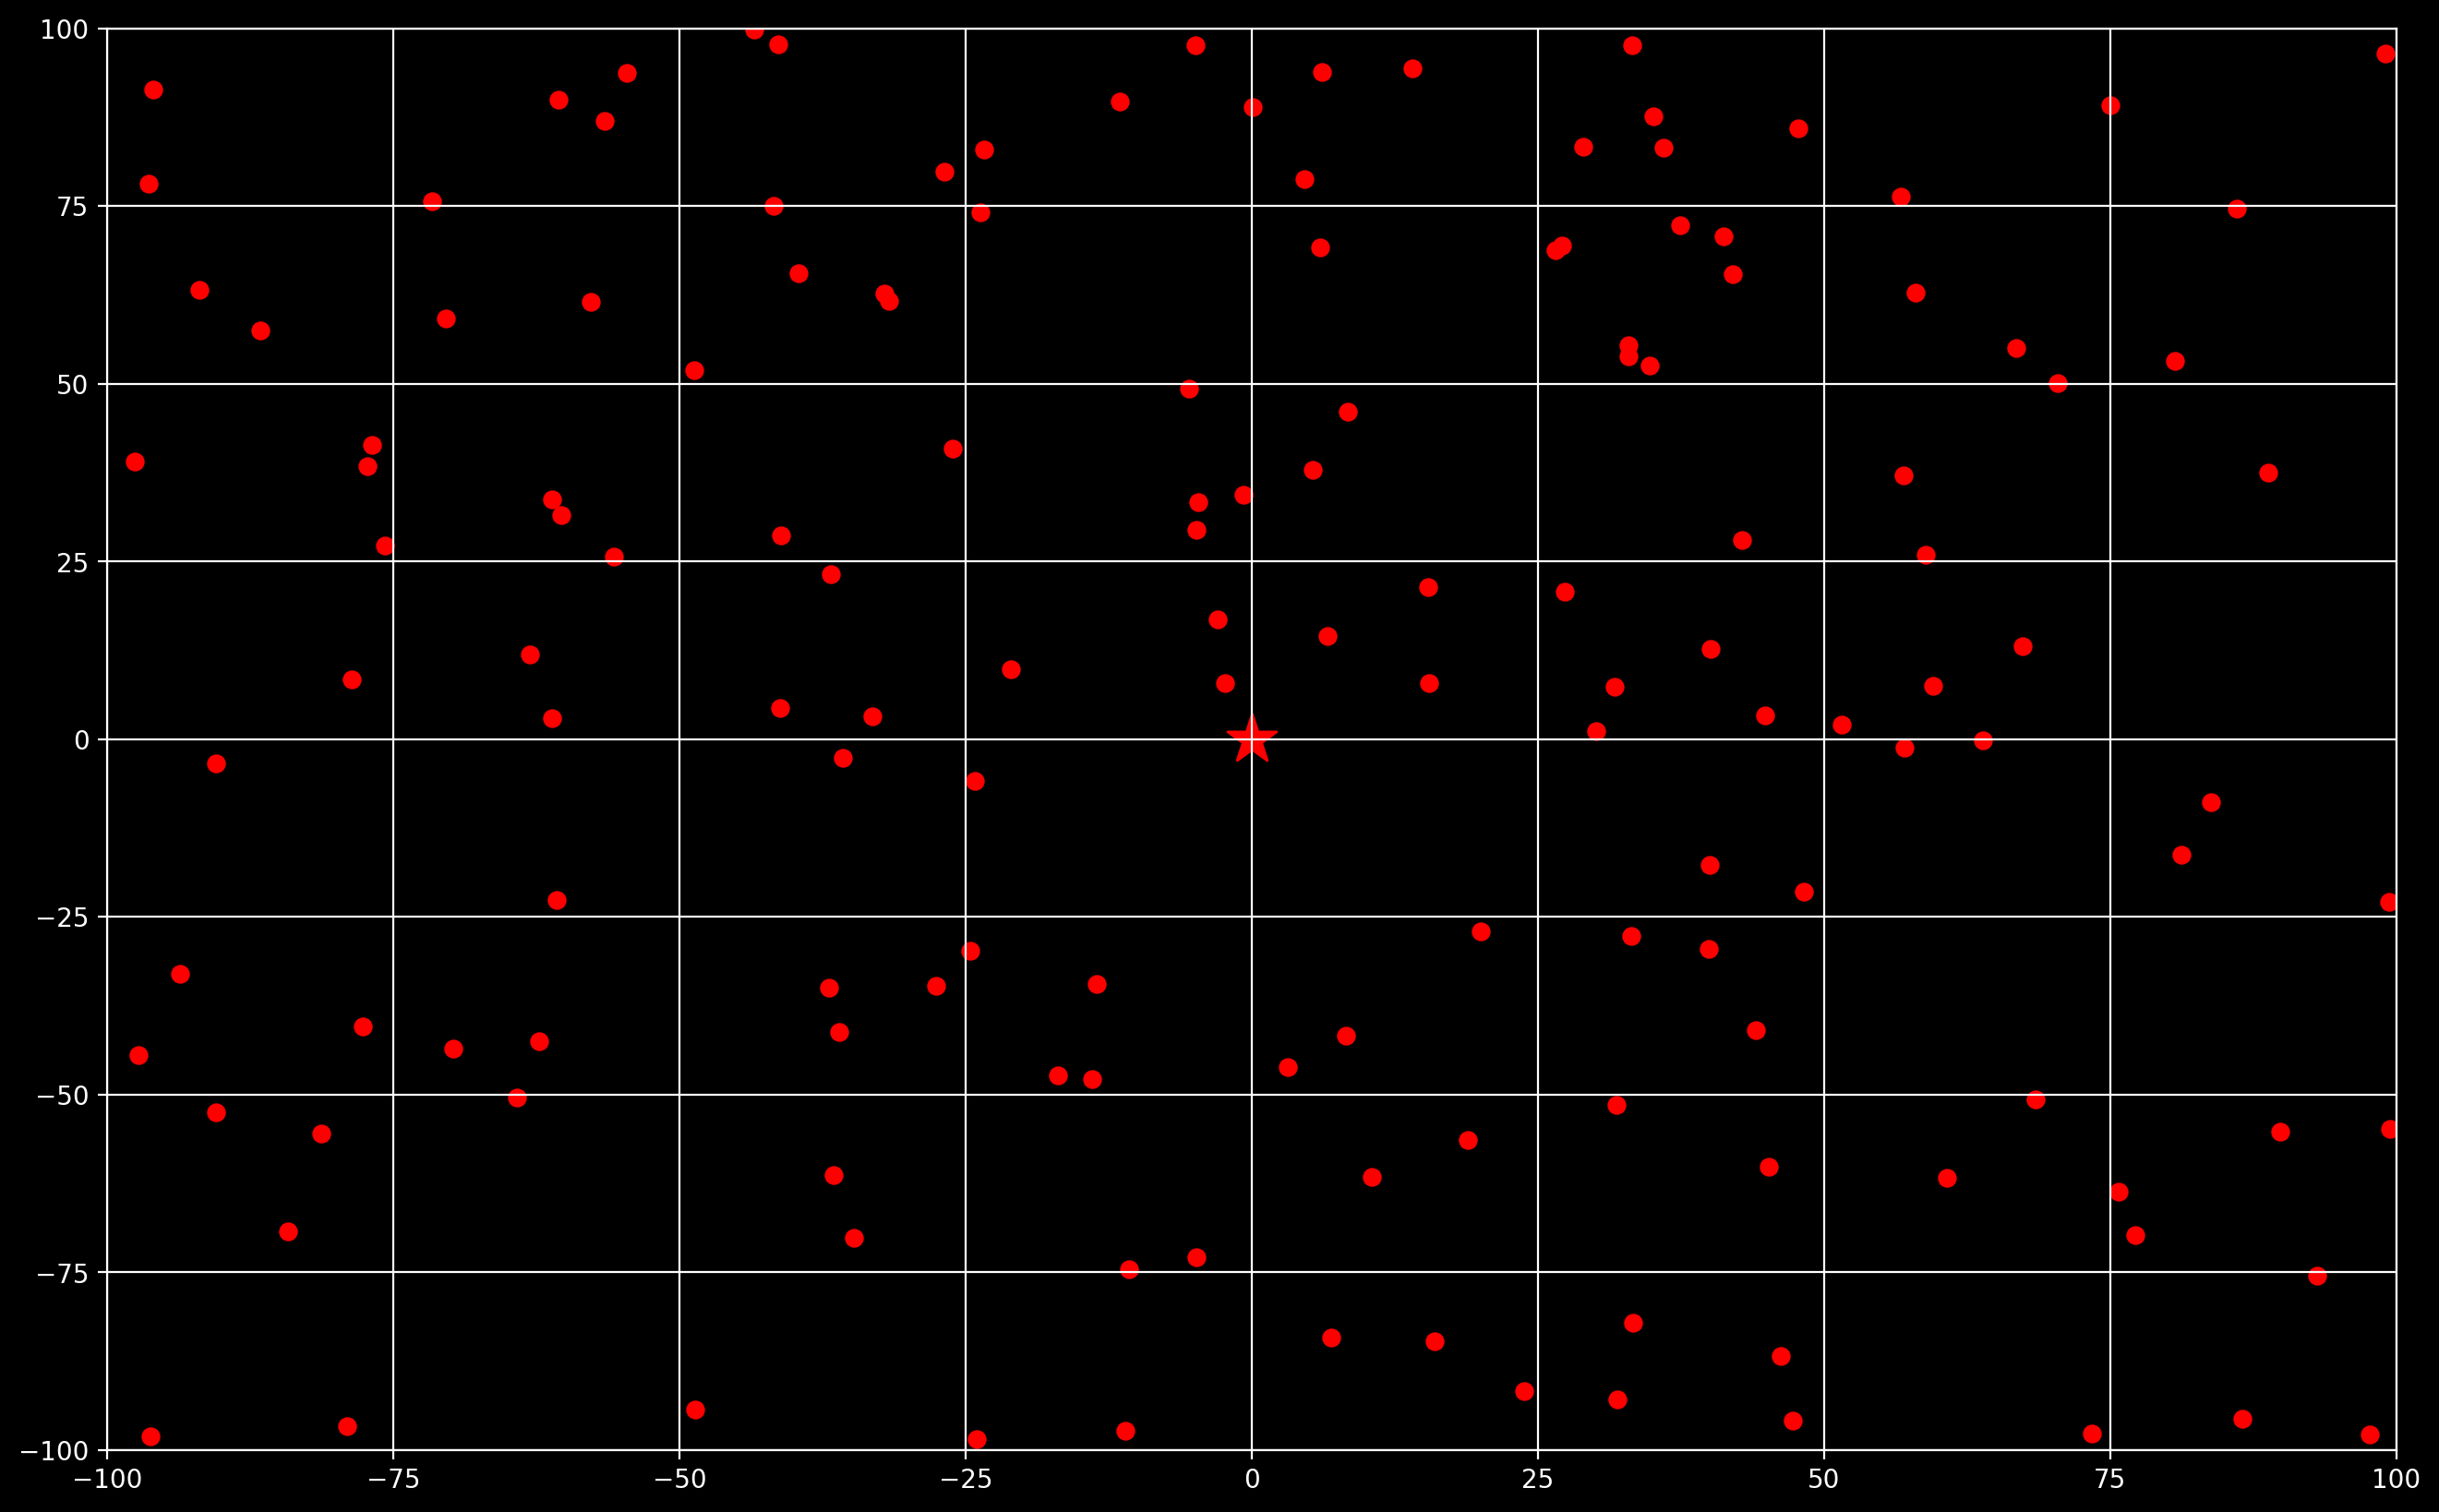

In [5]:
plt.scatter(data.x, data.y, c='r', marker='o', s=40)
plt.scatter(data.iloc[0].x, data.iloc[0].y, marker='*', c='r', s=400)
plt.axis([-100,100,-100,100])
plt.grid(True)

In [6]:
distance_func = lambda a,b: np.sqrt((a.x-b.x)**2 + (a.y-b.y)**2)
def compute_distances(dfunc=distance_func):
    for i in range(size+1):
        current=data.iloc[i]
        data[i]=dfunc(current, data)
        #data[str(i)][i]=np.nan

%time compute_distances()
data

CPU times: user 290 ms, sys: 3.01 ms, total: 293 ms
Wall time: 323 ms


<ipython-input-6-8a2abb06224f>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=dfunc(current, data)
<ipython-input-6-8a2abb06224f>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=dfunc(current, data)
<ipython-input-6-8a2abb06224f>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dat

,x,y,0,1,2,3,4,5,6,7,...,141,142,143,144,145,146,147,148,149,150
0,0.000000,0.000000,0.000000,30.094619,98.906970,86.402846,103.078947,106.124389,74.577630,106.846484,...,59.528289,48.525504,79.048708,88.182216,69.747483,60.216973,61.156032,26.391096,73.713707,64.129271
1,30.074848,1.090675,30.094619,0.000000,79.199277,63.440275,96.539672,123.683115,68.434599,98.436519,...,58.616164,68.857475,108.921496,82.214930,96.802687,44.383034,91.180819,25.020186,67.768880,93.714821
2,75.720294,-63.631955,98.906970,79.199277,0.000000,113.781493,166.719068,128.062552,141.682044,42.996311,...,57.276463,145.932898,170.304863,154.196790,167.877766,38.886864,152.116365,104.218532,141.236354,157.968538
3,70.446614,50.027257,86.402846,63.440275,113.781493,0.000000,60.390171,187.123389,47.464297,147.701132,...,118.299618,96.980912,154.751471,53.194391,132.536951,94.792692,139.732470,62.001337,47.732738,138.795084
4,33.220333,97.579090,103.078947,96.539672,166.719068,60.390171,0.000000,208.633848,28.765741,193.924735,...,154.693357,82.044400,143.027539,14.908663,113.910385,139.028595,133.655082,78.229684,29.574281,128.838562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,44.080113,-41.024718,60.216973,44.383034,38.886864,94.792692,139.028595,106.925989,111.777718,54.904573,...,29.532534,107.881768,132.263062,125.240877,128.991014,0.000000,113.962007,68.670000,111.183576,119.462961
147,-61.088577,2.871590,61.156032,91.180819,152.116365,139.732470,133.655082,98.008518,110.540955,146.552646,...,99.581774,51.676834,18.364522,120.721578,30.806070,113.962007,0.000000,78.750857,109.645851,9.244708
148,15.453097,21.393731,26.391096,25.020186,104.218532,62.001337,78.229684,132.278609,49.469965,121.463982,...,77.919459,45.910194,94.947451,63.356419,77.510705,68.670000,78.750857,0.000000,48.655456,79.036577
149,26.546590,68.767646,73.713707,67.768880,141.236354,47.732738,29.574281,179.587519,0.916230,165.901224,...,125.450782,59.568512,121.244564,14.726106,94.389526,111.183576,109.645851,48.655456,0.000000,106.081385


In [7]:
estimate_cost = lambda route: sum(data.iloc[i][j] for i,j in zip(route, route[1:]))
get_coords = lambda route: list(zip(*[(data.iloc[i].x,data.iloc[i].y) for i in route]))

### Method 1: Nearest Neighbor heuristic (without 2-opt)

In [8]:
def nearest_neighbor(unserved, stop_condition=lambda route, target: False):
    current=0 #depot
    result_path=[]
    while True:
        result_path.append(current)
        unserved.remove(current)
        if not unserved:
            break

        current=data.iloc[unserved,current+2].idxmin()
        if stop_condition(result_path, int(current)):
            if len(result_path)>1:
                break

    result_path.append(0)
    return result_path

%time route = nearest_neighbor(list(range(size+1)))
print('cost={}\nroute={}'.format(estimate_cost(route),route))

CPU times: user 56.1 ms, sys: 1.89 ms, total: 58 ms
Wall time: 62.4 ms
cost=2623.828598616268
route=[0, 53, 60, 20, 66, 148, 55, 51, 1, 120, 104, 123, 74, 93, 130, 42, 29, 19, 91, 107, 81, 11, 134, 117, 57, 30, 34, 67, 75, 46, 39, 131, 16, 114, 72, 96, 38, 22, 122, 92, 36, 126, 113, 7, 58, 111, 28, 108, 63, 2, 137, 50, 128, 69, 141, 18, 146, 37, 54, 95, 24, 121, 35, 83, 3, 49, 12, 73, 105, 129, 90, 144, 9, 86, 132, 31, 70, 127, 149, 6, 71, 41, 140, 76, 102, 32, 100, 97, 139, 88, 78, 26, 17, 135, 27, 13, 110, 89, 59, 119, 40, 15, 56, 145, 10, 106, 82, 94, 115, 87, 98, 44, 64, 52, 14, 33, 136, 124, 65, 142, 150, 147, 143, 109, 112, 23, 47, 101, 45, 138, 99, 133, 8, 48, 62, 80, 103, 43, 68, 61, 125, 21, 25, 118, 5, 79, 116, 77, 85, 84, 4, 0]


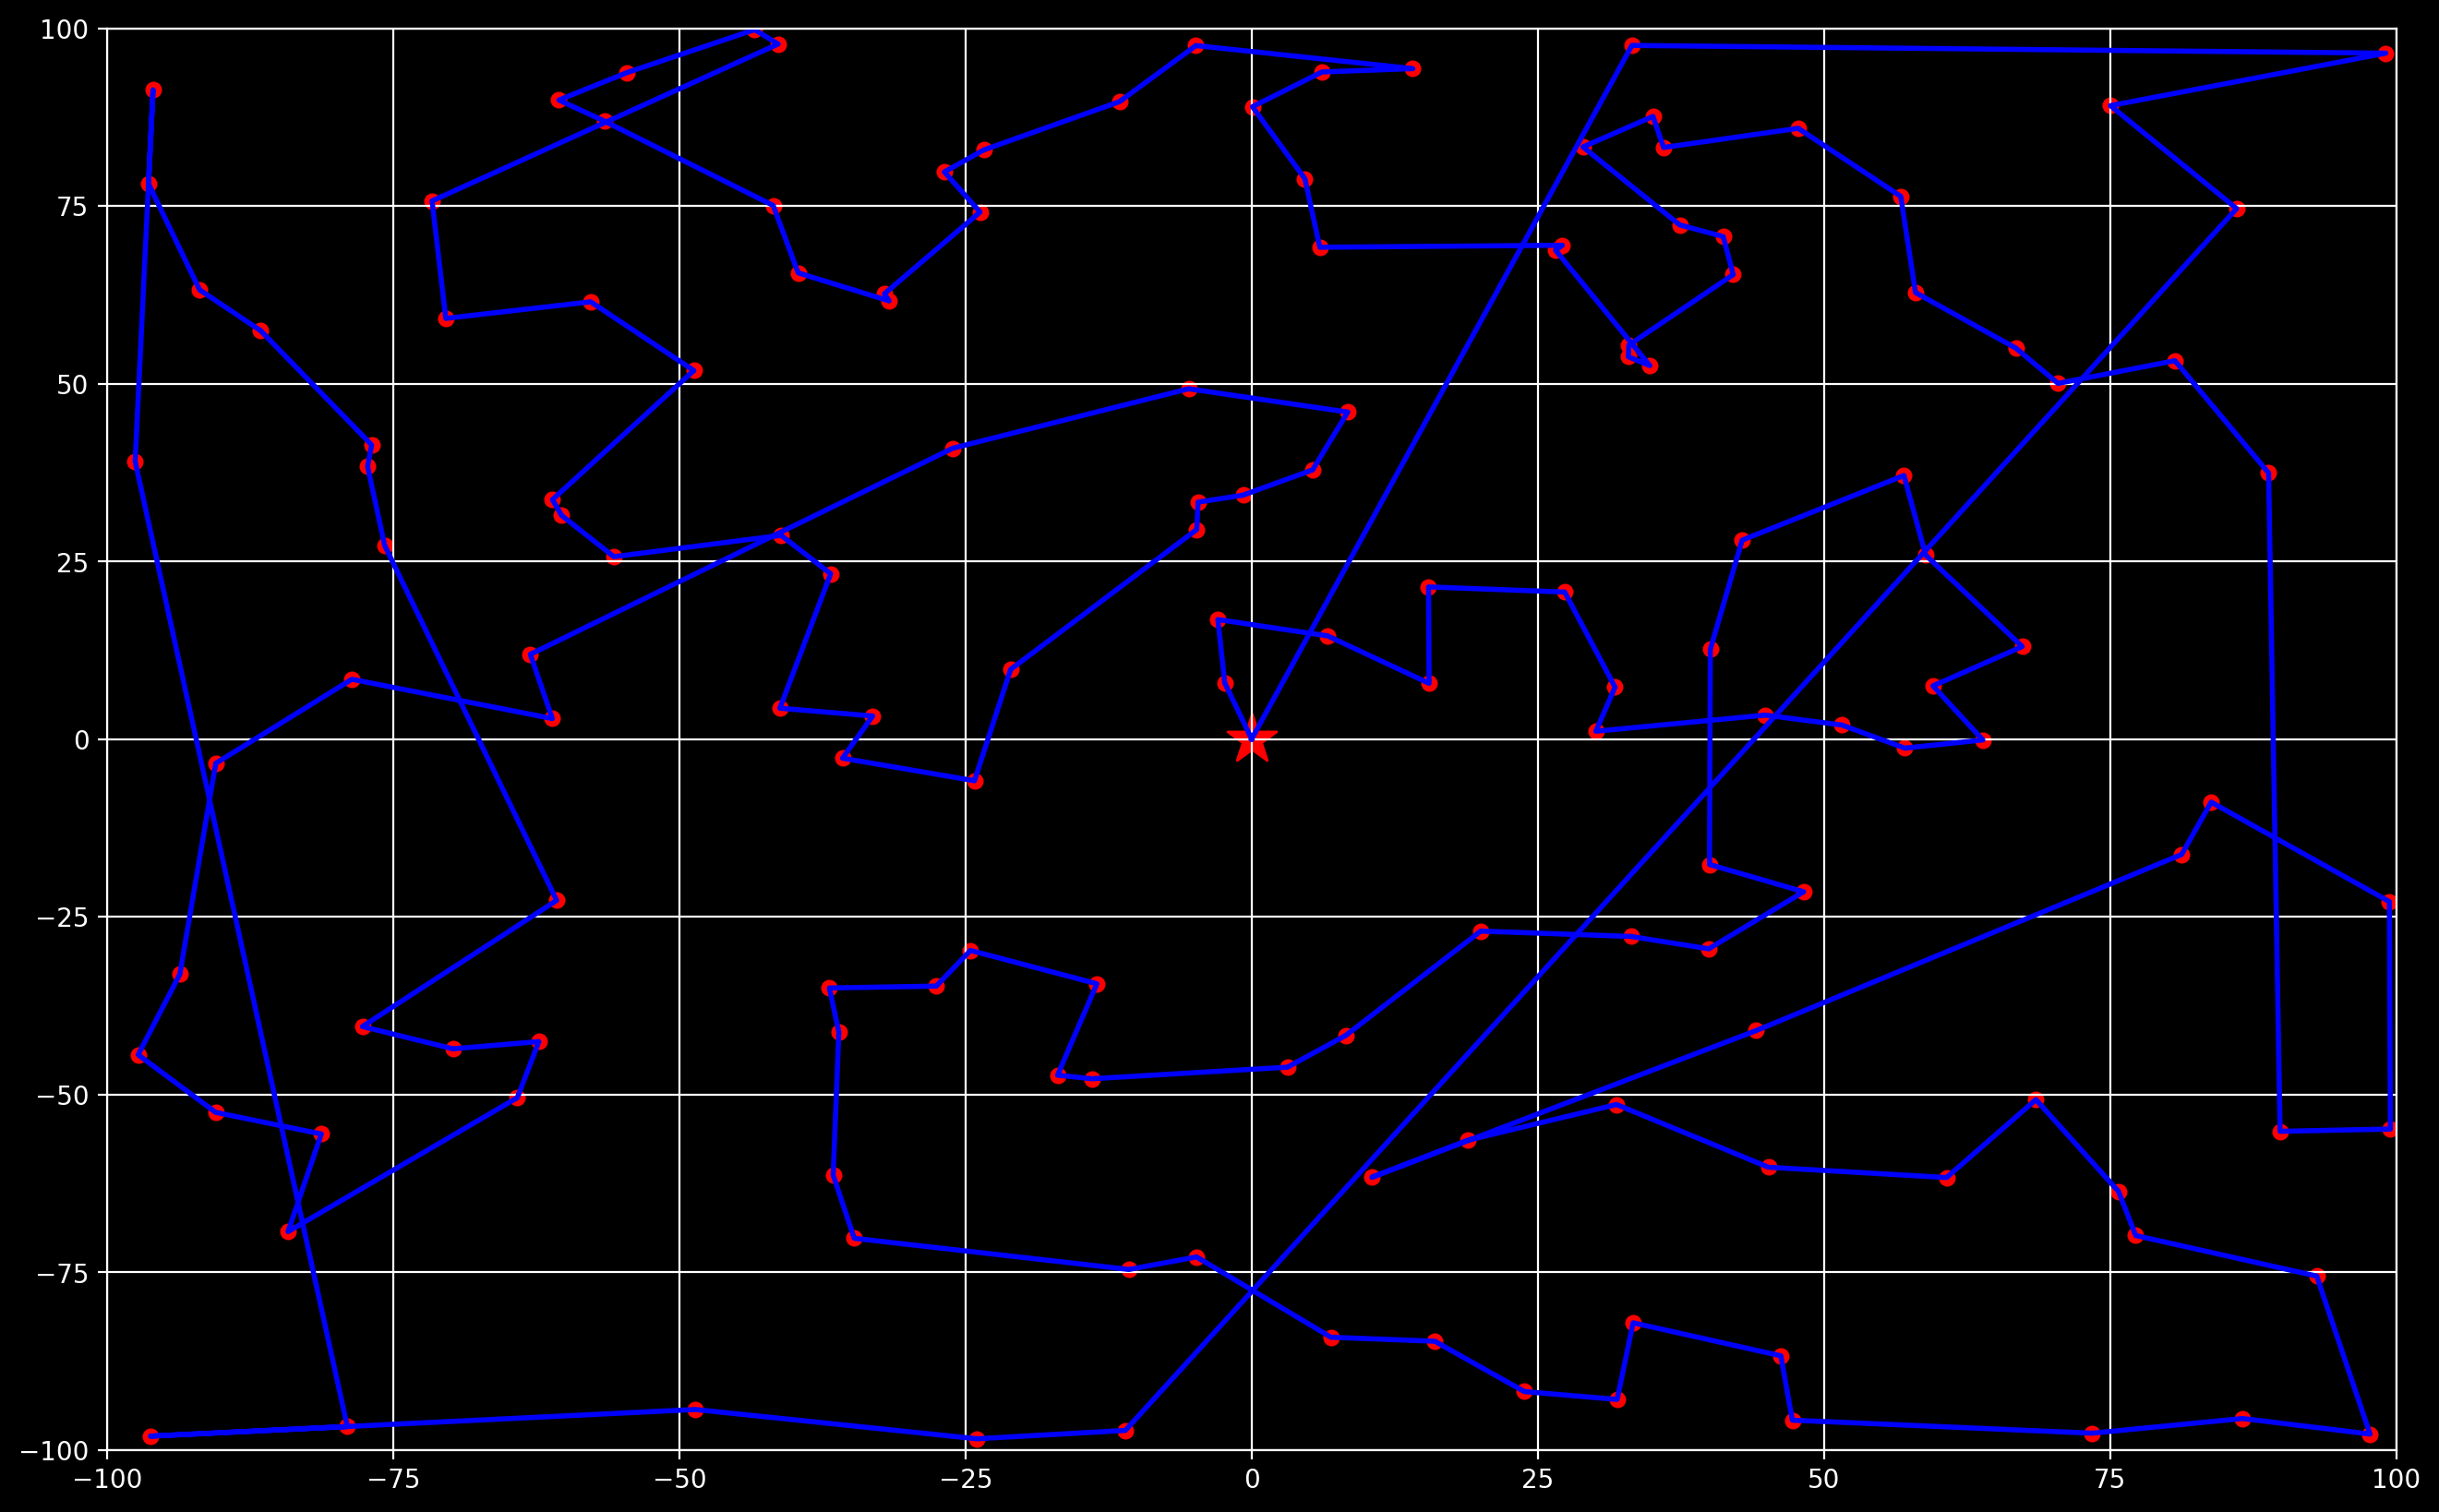

In [9]:
coords=get_coords(route)
plt.plot(coords[0], coords[1], 'b-', linewidth=2)
plt.scatter(data.x, data.y, c='r', s=30)
plt.scatter(data.iloc[0].x, data.iloc[0].y, marker='*', c='r', s=400)
plt.axis([-100,100,-100,100])
plt.grid(True)

### Method 2: Nearest Neighbor heuristic (with 2-opt)

In [10]:
def twoOptSwap(route,i,j):
    t=route[i:j+1];
    t.reverse();
    route[i:j+1]=t

def twoOpt(route):
    cost=estimate_cost(route)

    def inner():
        nonlocal cost
        for i in range(1,len(route)-2):
            nodei=data.iloc[route[i]]
            for j in range(i+1,len(route)-1):
                nodej=data.iloc[route[j]]
                save=nodei.iloc[route[i-1]+2]+nodej.iloc[route[j+1]+2] - (nodej.iloc[route[i-1]+2]+nodei.iloc[route[j+1]+2])
                if save>0:
                    twoOptSwap(route,i,j)

                    cost-=save
                    print('exchanging {}-{},{}-{} with {}-{},{}-{} => save={} => cost: {}'.format(
                            route[i-1],route[i],route[j],route[j+1],route[i-1],route[j],route[i],route[j+1],save,cost))
                    return False
        return True

    while True:
        if inner():
            break

%time twoOpt(route)
print('cost={}\nroute={}'.format(estimate_cost(route),route))

exchanging 53-64,60-52 with 53-60,64-52 => save=2.8803537373675177 => cost: 2620.948244878901
exchanging 53-4,64-0 with 53-64,4-0 => save=2.1646493955605024 => cost: 2618.7835954833404
exchanging 53-150,4-142 with 53-4,150-142 => save=0.5913895920361654 => cost: 2618.192205891304
exchanging 53-147,150-143 with 53-150,147-143 => save=4.232088018183788 => cost: 2613.9601178731205
exchanging 53-48,147-62 with 53-147,48-62 => save=16.791995889494686 => cost: 2597.168121983626
exchanging 53-21,48-25 with 53-48,21-25 => save=26.51864663222443 => cost: 2570.6494753514016
exchanging 53-43,21-103 with 53-21,43-103 => save=0.4135489632104594 => cost: 2570.2359263881913
exchanging 53-125,43-21 with 53-43,125-21 => save=3.198442998873162 => cost: 2567.037483389318
exchanging 53-116,125-77 with 53-125,116-77 => save=34.557040956073024 => cost: 2532.480442433245
exchanging 53-117,116-57 with 53-116,117-57 => save=24.084477030746356 => cost: 2508.395965402499
exchanging 53-64,117-0 with 53-117,64-0 =

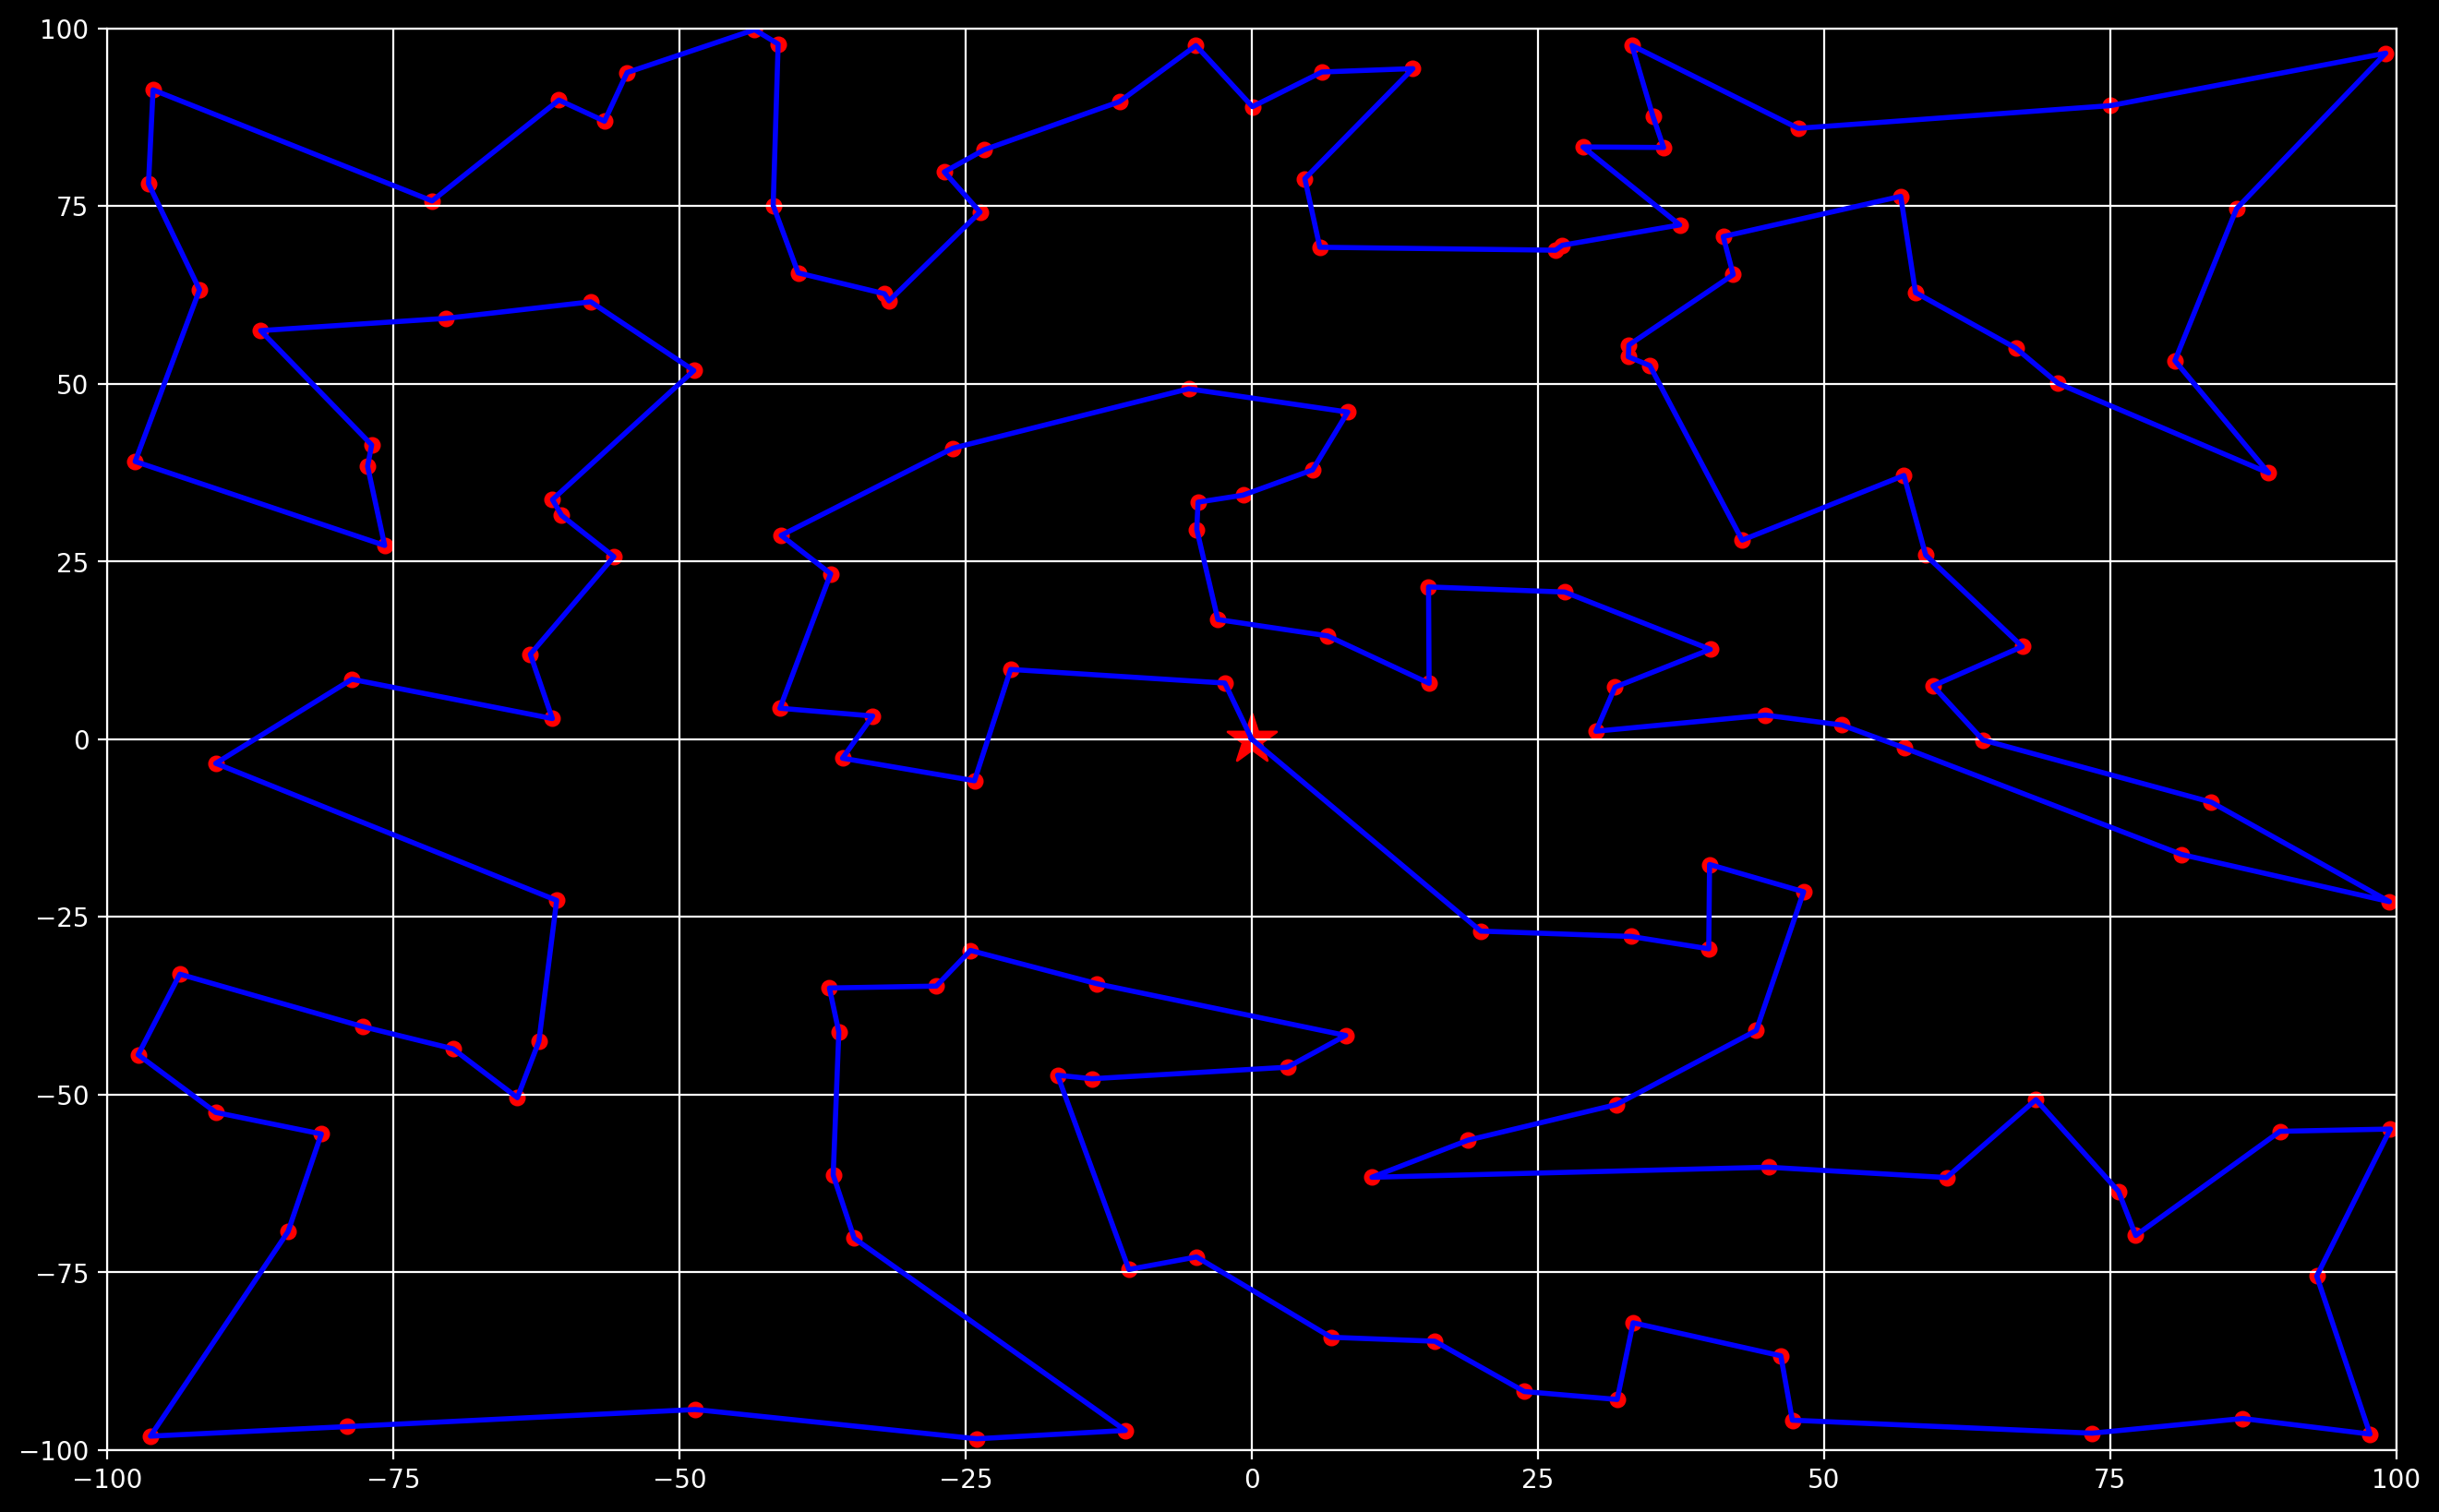

In [11]:
coords=get_coords(route)
plt.plot(coords[0], coords[1], 'b-', linewidth=2)
plt.scatter(data.x, data.y, c='r', s=30)
plt.scatter(data.iloc[0].x, data.iloc[0].y, marker='*', c='r', s=400)
plt.axis([-100,100,-100,100])
plt.grid(True)

### Method 3: center depot, one van, randomized nearest neighbour heuristic (with 2-opt)

Randomized route without NN applied on it yet

In [12]:
route = [x for x in range(size+1)]+[0]
print('cost={}\nroute={}'.format(estimate_cost(route),route))

cost=16332.039263088578
route=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 0]


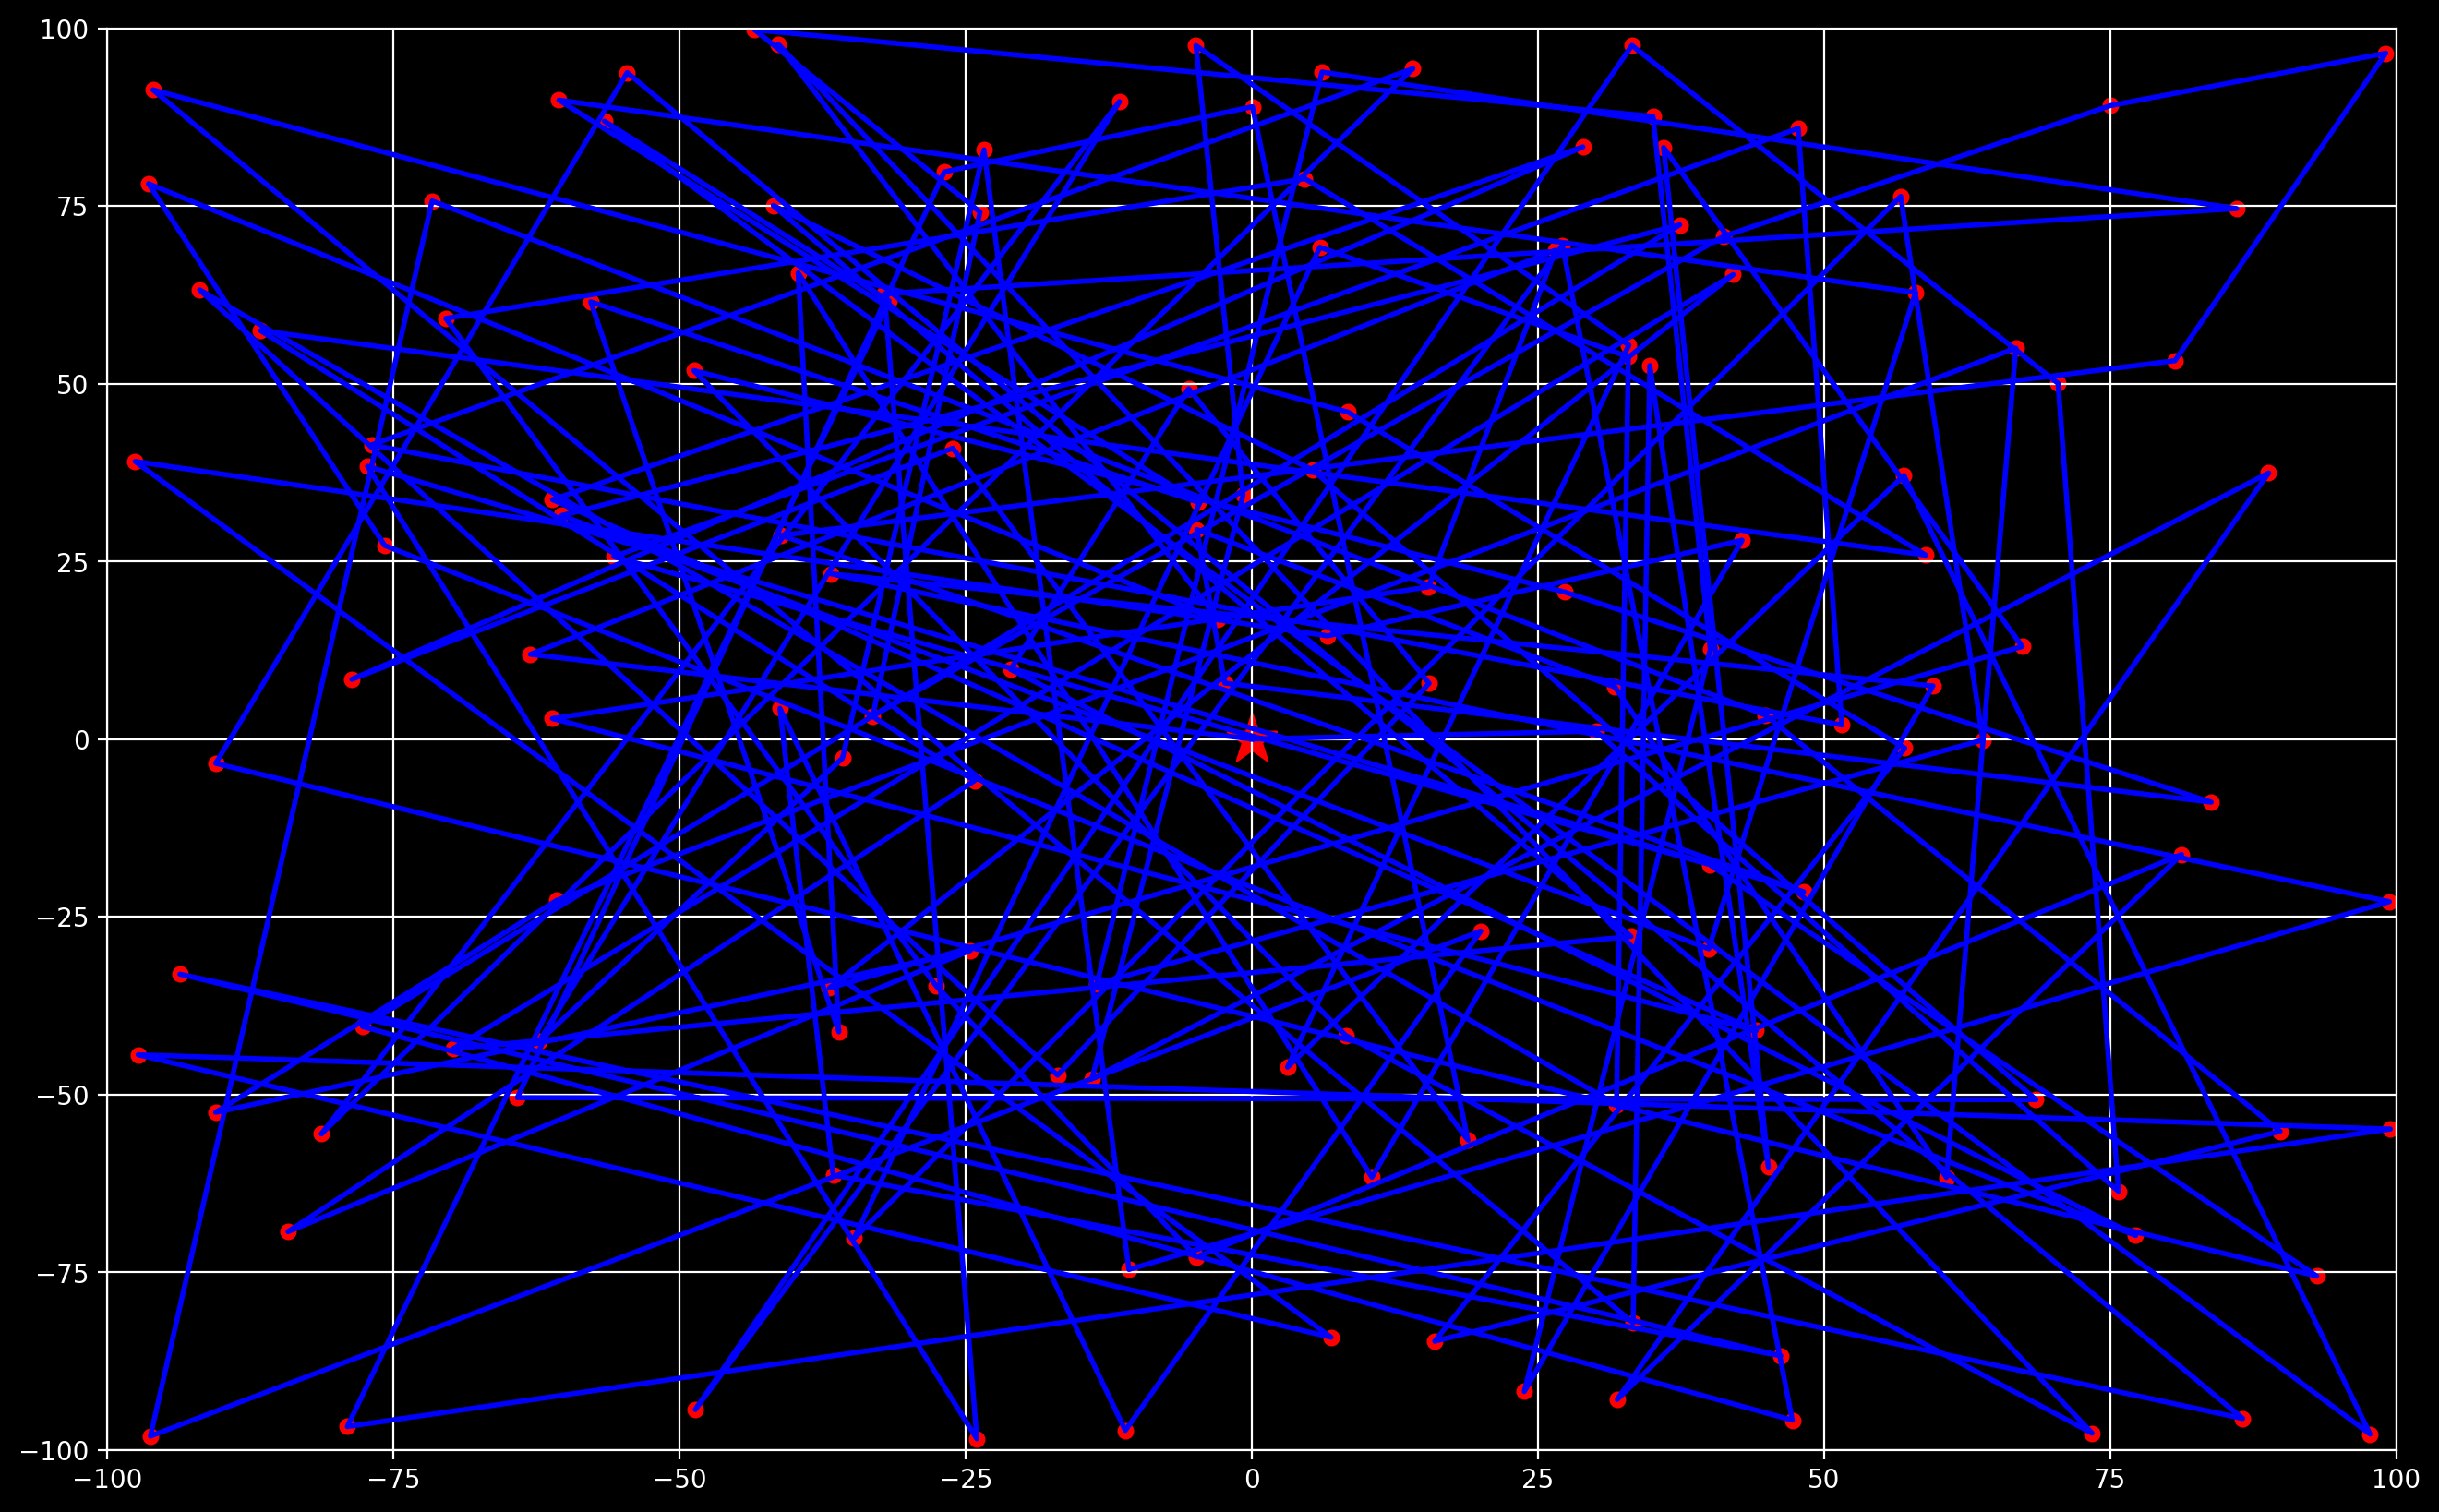

In [13]:
coords=get_coords(route)
plt.plot(coords[0], coords[1], 'b-', linewidth=2)
plt.scatter(data.x, data.y, c='r', s=30)
plt.scatter(data.iloc[0].x, data.iloc[0].y, marker='*', c='r', s=400)
plt.axis([-100,100,-100,100])
plt.grid(True)

In [14]:
%time twoOpt(route)
print('cost={}'.format(estimate_cost(route)))

exchanging 0-4,1-5 with 0-1,4-5 => save=11.966404491447804 => cost: 16320.07285859713
exchanging 0-5,4-6 with 0-4,5-6 => save=148.65750376301747 => cost: 16171.415354834113
exchanging 0-1,5-2 with 0-5,1-2 => save=27.16649580822525 => cost: 16144.248859025887
exchanging 0-6,1-7 with 0-1,6-7 => save=23.598010199272267 => cost: 16120.650848826615
exchanging 0-5,6-1 with 0-6,5-1 => save=23.701757832884823 => cost: 16096.94909099373
exchanging 0-1,5-7 with 0-5,1-7 => save=78.61331452985205 => cost: 16018.335776463879
exchanging 0-8,1-9 with 0-1,8-9 => save=32.02762827443513 => cost: 15986.308148189444
exchanging 0-7,8-5 with 0-8,7-5 => save=15.362620333873394 => cost: 15970.94552785557
exchanging 0-5,7-2 with 0-7,5-2 => save=85.78833506582373 => cost: 15885.157192789748
exchanging 0-8,5-7 with 0-5,8-7 => save=59.33029366320022 => cost: 15825.826899126547
exchanging 0-9,8-10 with 0-8,9-10 => save=38.07258699930202 => cost: 15787.754312127245
exchanging 0-1,9-6 with 0-9,1-6 => save=109.117718

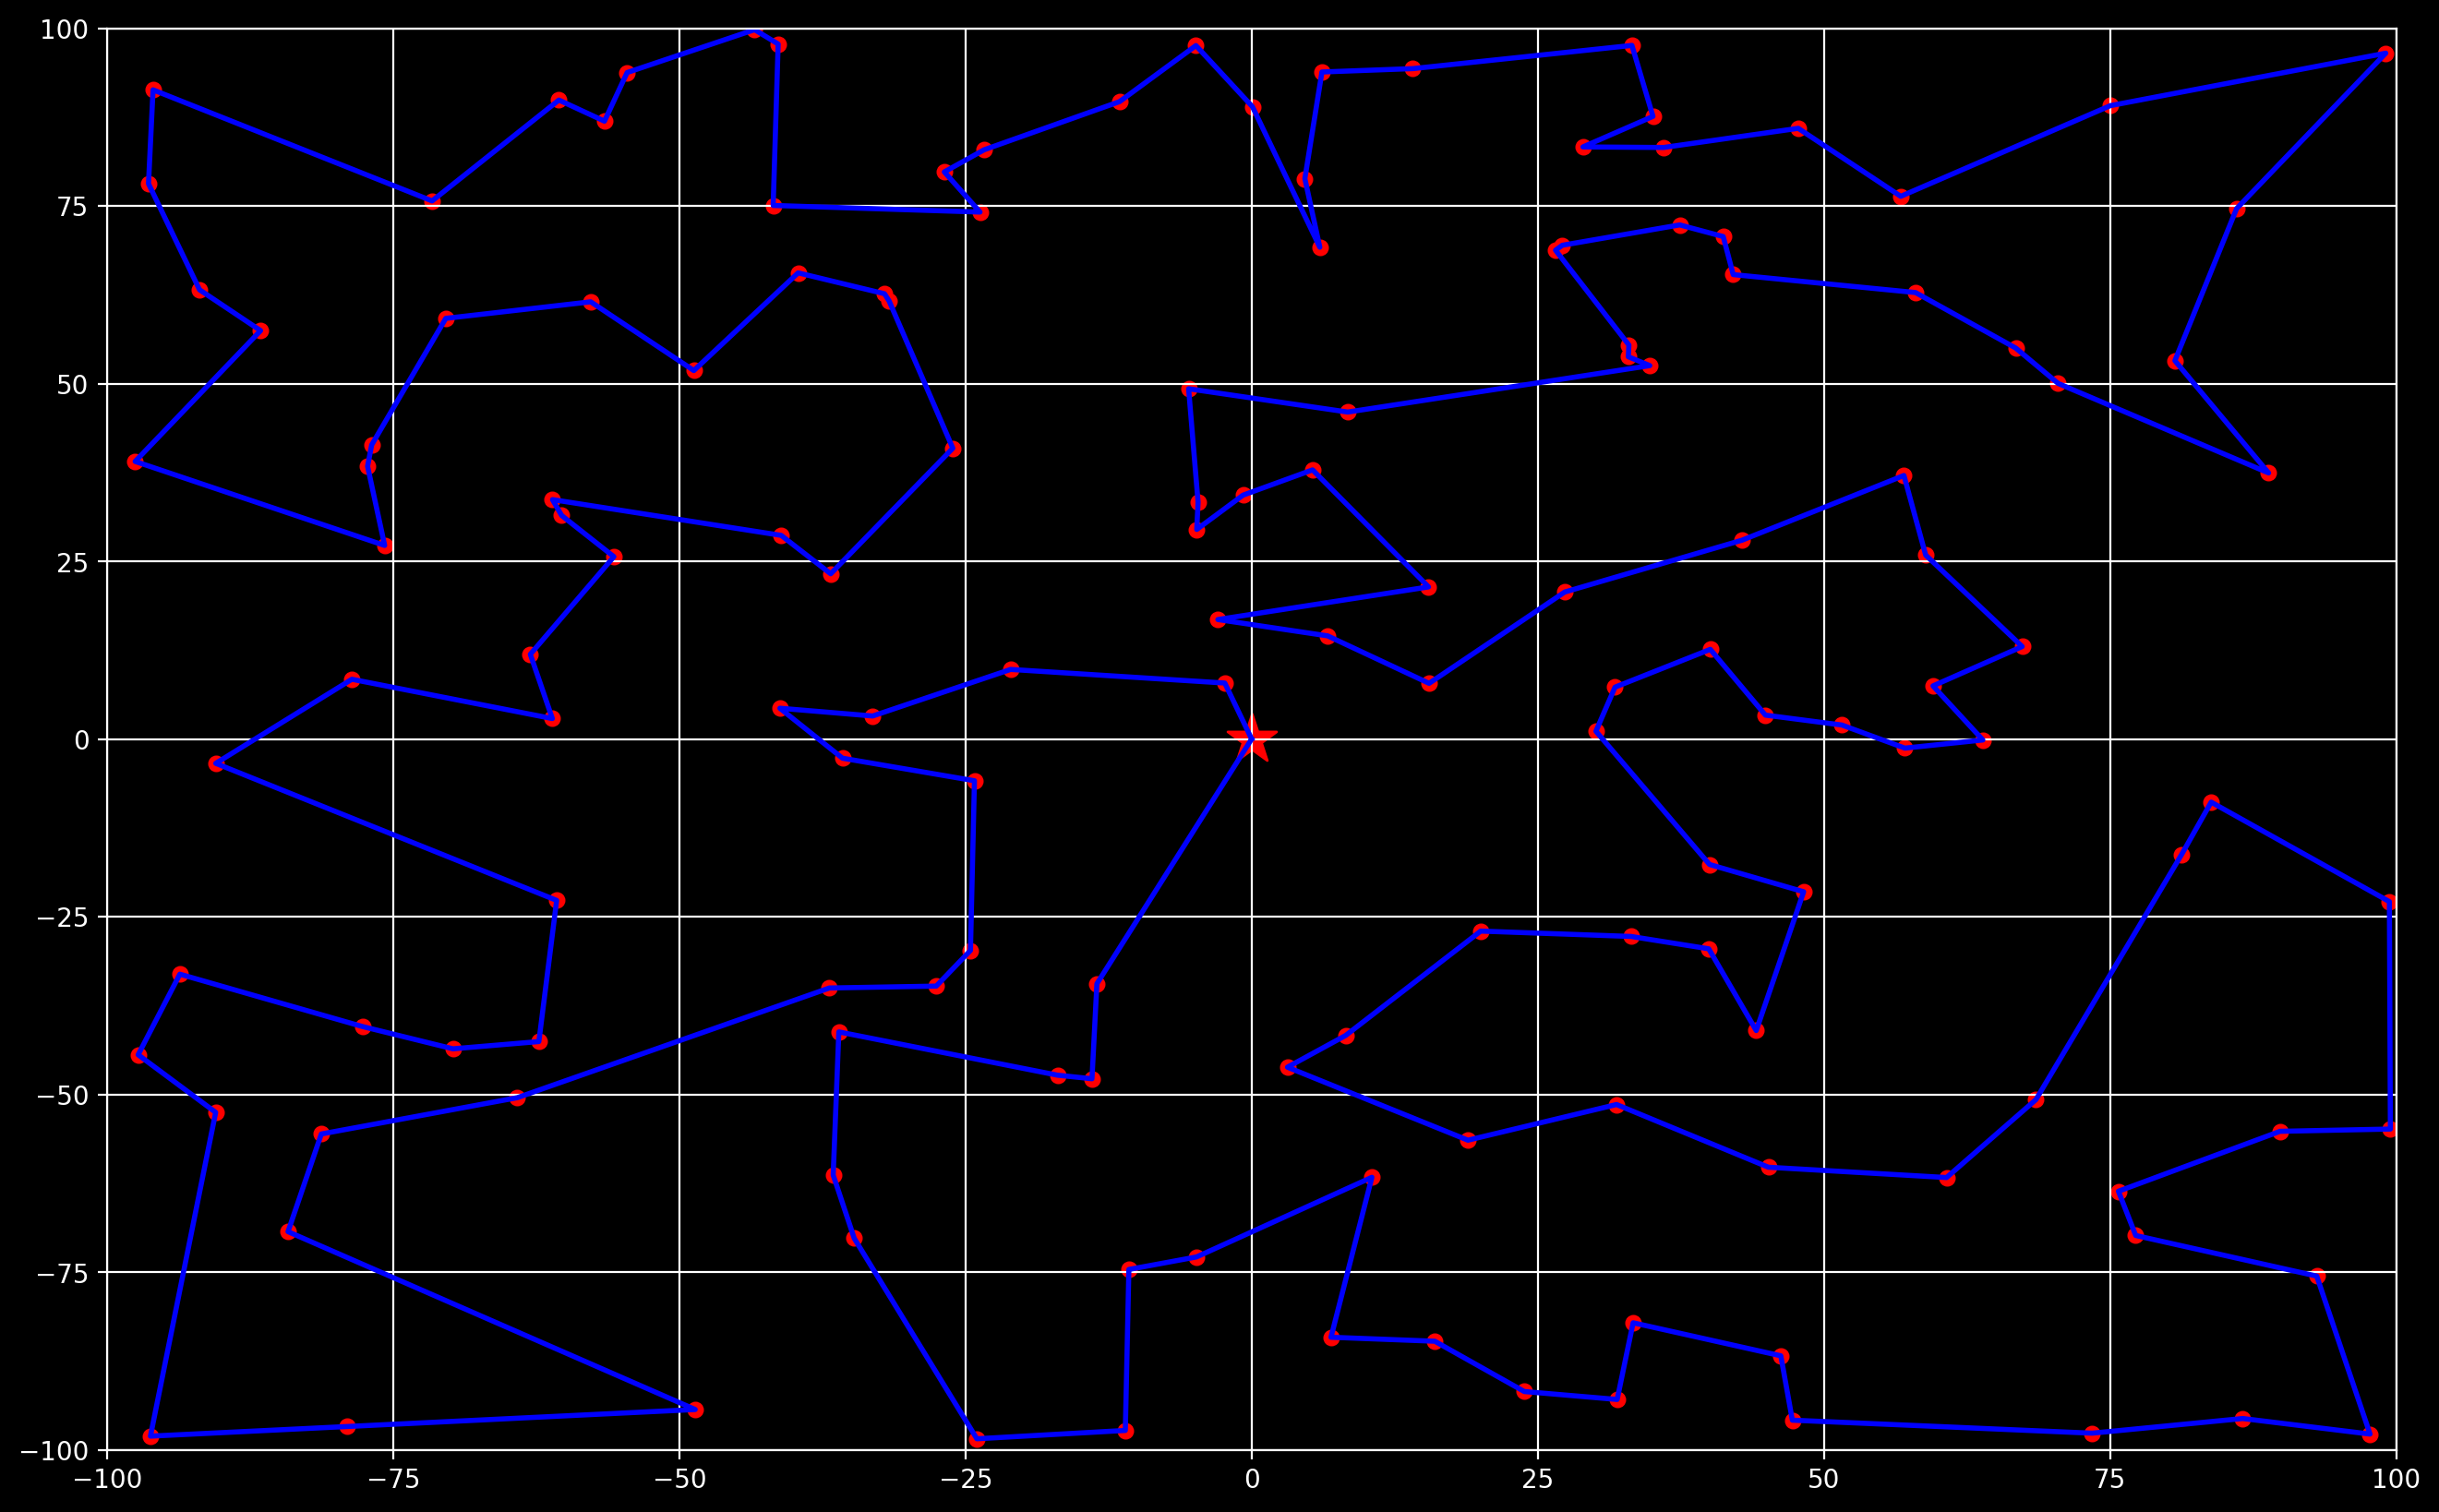

In [15]:
coords=get_coords(route)
plt.plot(coords[0], coords[1], 'b-', linewidth=2)
plt.scatter(data.x, data.y, c='r', s=30)
plt.scatter(data.iloc[0].x, data.iloc[0].y, marker='*', c='r', s=400)
plt.axis([-100,100,-100,100])
plt.grid(True)

###Method 4: Christofides algorithm

In [16]:
def tsp(data):
    G = build_graph(data)
    MSTree = minimum_spanning_tree(G)
    odd_vertexes = find_odd_vertexes(MSTree)
    minimum_weight_matching(MSTree, G, odd_vertexes)
    eulerian_tour = find_eulerian_tour(MSTree, G)
    current = eulerian_tour[0]
    path = [current]
    visited = [False] * len(eulerian_tour)
    visited[eulerian_tour[0]] = True
    length = 0

    for v in eulerian_tour:
        if not visited[v]:
            path.append(v)
            visited[v] = True

            length += G[current][v]
            current = v

    length +=G[current][eulerian_tour[0]]
    path.append(eulerian_tour[0])
    return length, path


def get_length(x1, y1, x2, y2):
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** (1.0 / 2.0)


def build_graph(data):
    graph = {}
    for this in range(len(data)):
        for another_point in range(len(data)):
            if this != another_point:
                if this not in graph:
                    graph[this] = {}

                graph[this][another_point] = get_length(data[this][0], data[this][1], data[another_point][0],
                                                        data[another_point][1])

    return graph


class UnionFind:
    def __init__(self):
        self.weights = {}
        self.parents = {}

    def __getitem__(self, object):
        if object not in self.parents:
            self.parents[object] = object
            self.weights[object] = 1
            return object
        path = [object]
        root = self.parents[object]
        while root != path[-1]:
            path.append(root)
            root = self.parents[root]
        for ancestor in path:
            self.parents[ancestor] = root
        return root

    def __iter__(self):
        return iter(self.parents)

    def union(self, *objects):
        roots = [self[x] for x in objects]
        heaviest = max([(self.weights[r], r) for r in roots])[1]
        for r in roots:
            if r != heaviest:
                self.weights[heaviest] += self.weights[r]
                self.parents[r] = heaviest


def minimum_spanning_tree(G):
    tree = []
    subtrees = UnionFind()
    for W, u, v in sorted((G[u][v], u, v) for u in G for v in G[u]):
        if subtrees[u] != subtrees[v]:
            tree.append((u, v, W))
            subtrees.union(u, v)

    return tree


def find_odd_vertexes(MST):
    tmp_g = {}
    vertexes = []
    for edge in MST:
        if edge[0] not in tmp_g:
            tmp_g[edge[0]] = 0

        if edge[1] not in tmp_g:
            tmp_g[edge[1]] = 0

        tmp_g[edge[0]] += 1
        tmp_g[edge[1]] += 1

    for vertex in tmp_g:
        if tmp_g[vertex] % 2 == 1:
            vertexes.append(vertex)

    return vertexes


def minimum_weight_matching(MST, G, odd_vert):
    import random
    random.shuffle(odd_vert)

    while odd_vert:
        v = odd_vert.pop()
        length = float("inf")
        u = 1
        closest = 0
        for u in odd_vert:
            if v != u and G[v][u] < length:
                length = G[v][u]
                closest = u

        MST.append((v, closest, length))
        odd_vert.remove(closest)


def find_eulerian_tour(MatchedMSTree, G):
    neighbours = {}
    for edge in MatchedMSTree:
        if edge[0] not in neighbours:
            neighbours[edge[0]] = []

        if edge[1] not in neighbours:
            neighbours[edge[1]] = []

        neighbours[edge[0]].append(edge[1])
        neighbours[edge[1]].append(edge[0])
    start_vertex = MatchedMSTree[0][0]
    EP = [neighbours[start_vertex][0]]

    while len(MatchedMSTree) > 0:
        for i, v in enumerate(EP):
            if len(neighbours[v]) > 0:
                break

        while len(neighbours[v]) > 0:
            w = neighbours[v][0]

            remove_edge_from_matchedMST(MatchedMSTree, v, w)

            del neighbours[v][(neighbours[v].index(w))]
            del neighbours[w][(neighbours[w].index(v))]

            i += 1
            EP.insert(i, w)

            v = w

    return EP


def remove_edge_from_matchedMST(MatchedMST, v1, v2):

    for i, item in enumerate(MatchedMST):
        if (item[0] == v2 and item[1] == v1) or (item[0] == v1 and item[1] == v2):
            del MatchedMST[i]

    return MatchedMST


%time length, path= tsp(data2)
print("Cost: ",length)


CPU times: user 101 ms, sys: 8 µs, total: 101 ms
Wall time: 112 ms
Cost:  2433.8559246783734


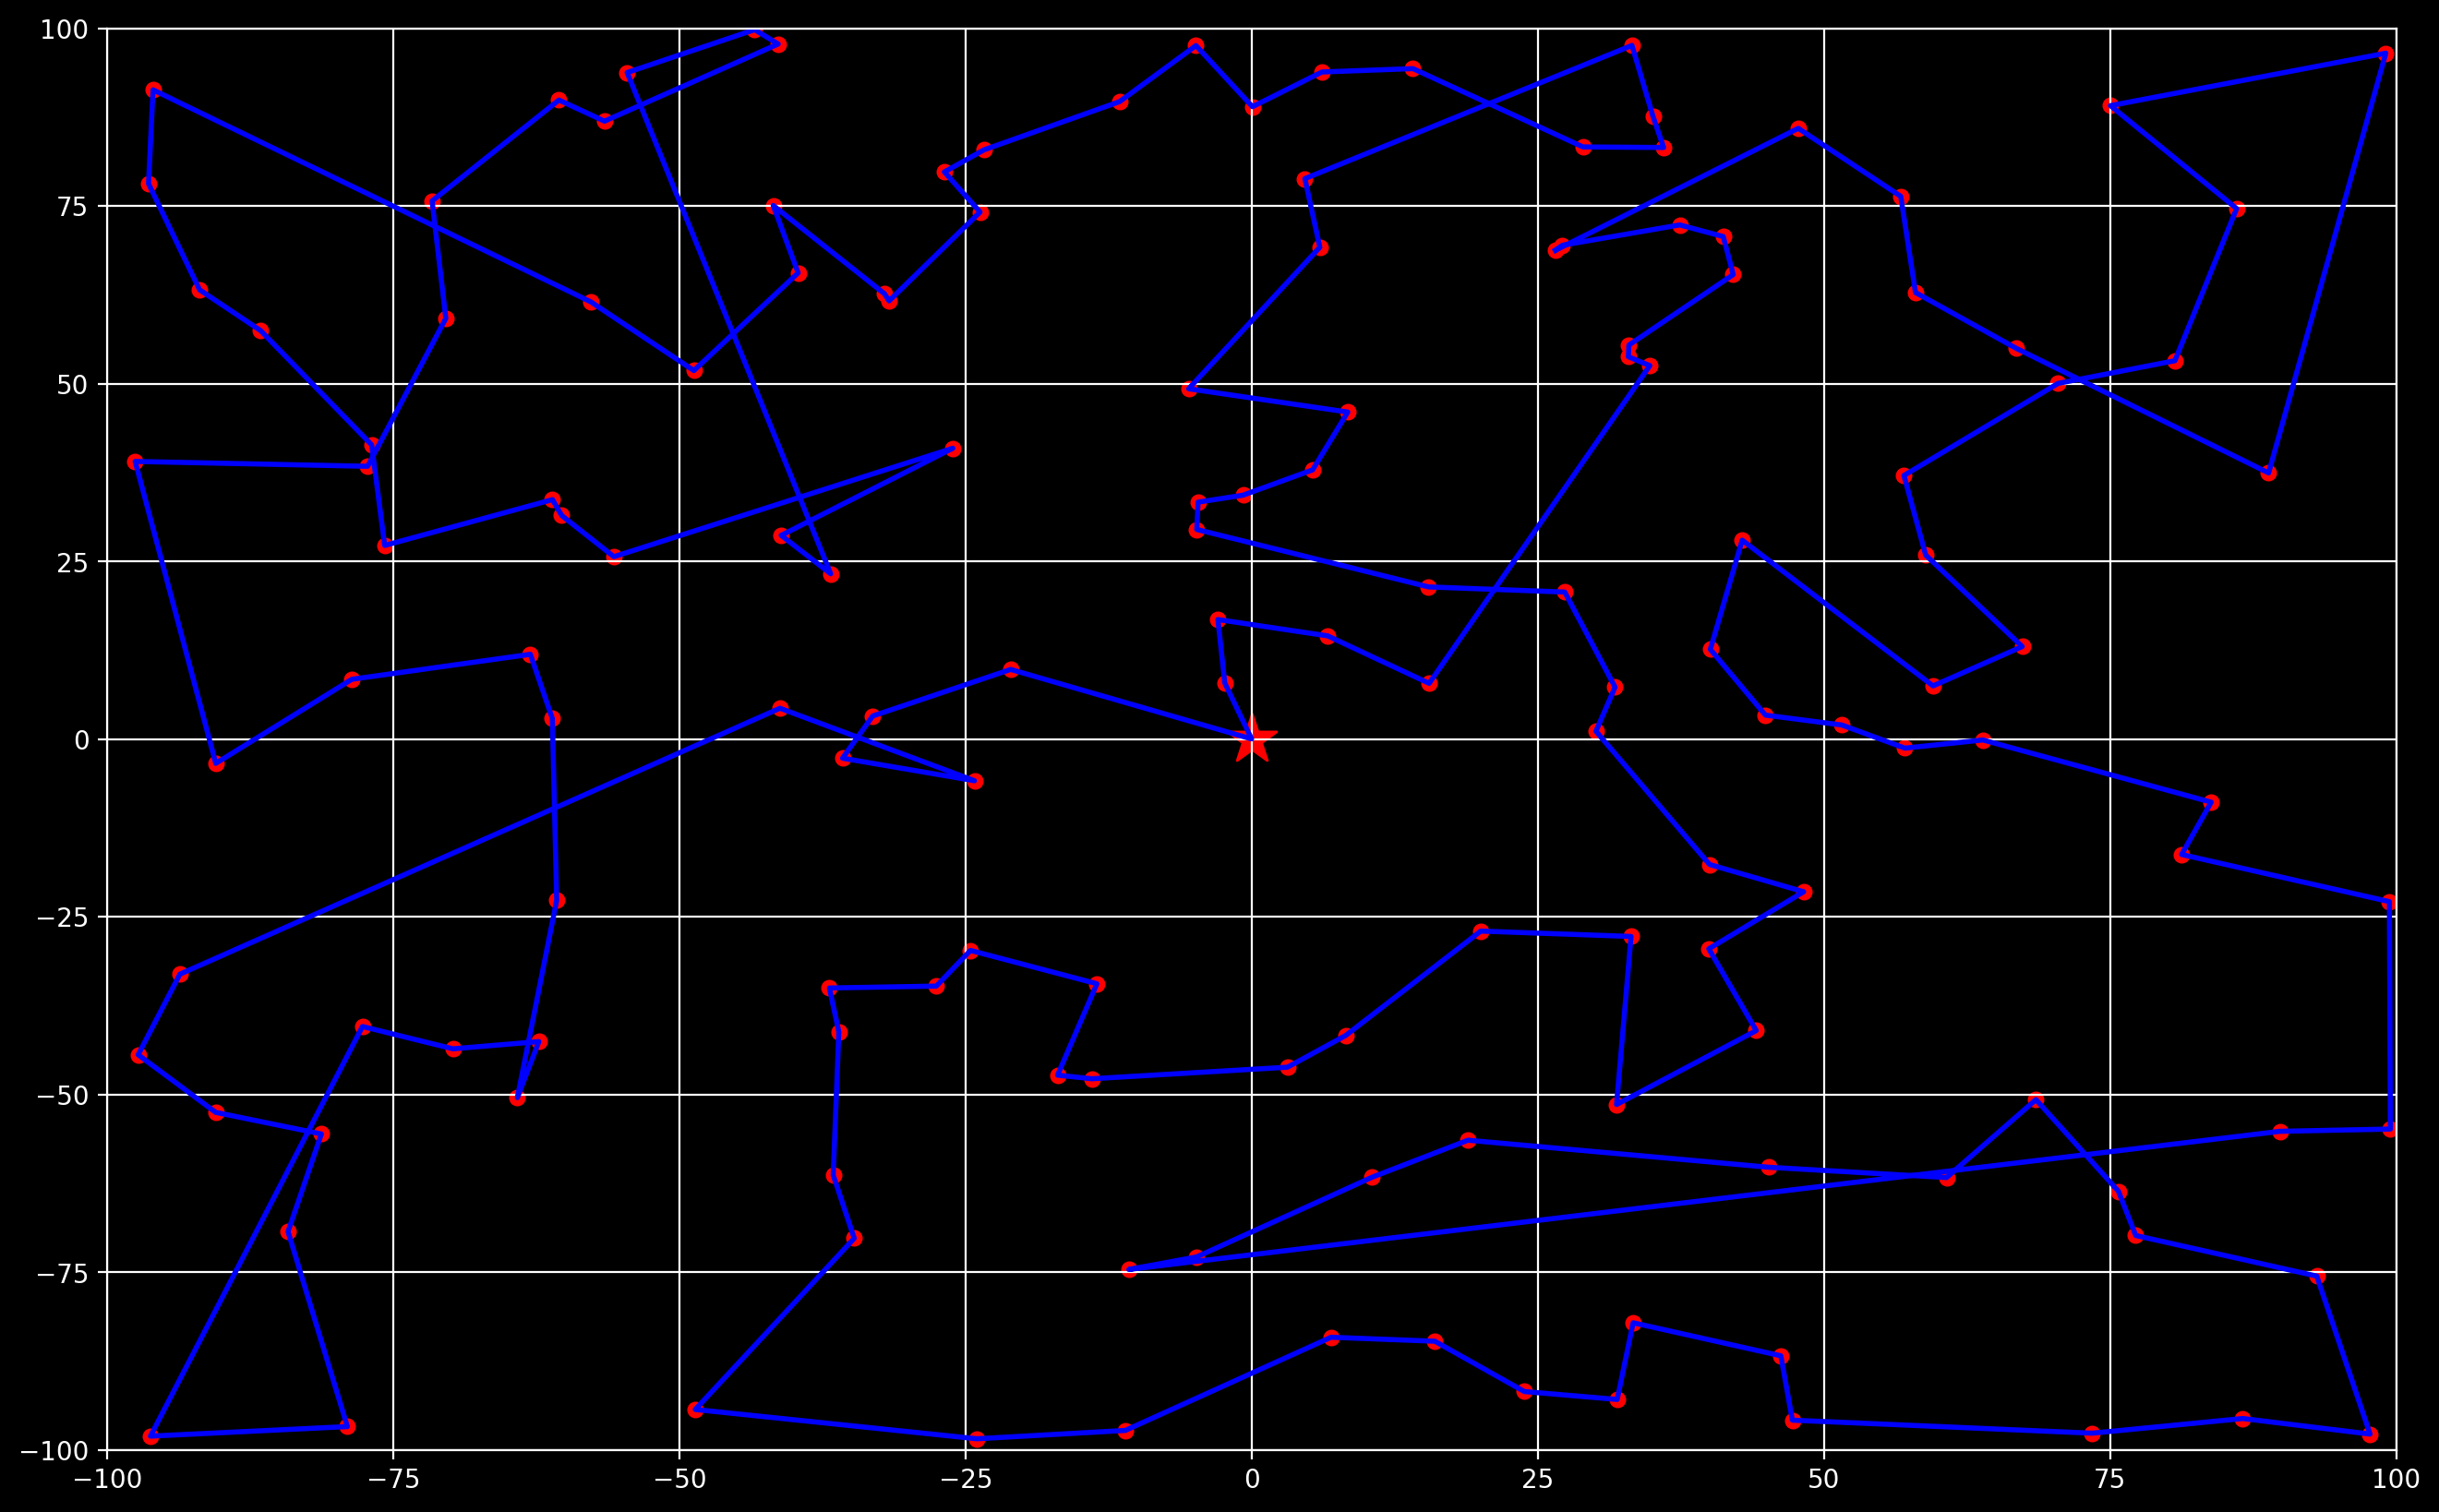

In [17]:
coords=get_coords(path)
plt.plot(coords[0], coords[1], 'b-', linewidth=2)
plt.scatter(data.x, data.y, c='r', s=30)
plt.scatter(data.iloc[0].x, data.iloc[0].y, marker='*', c='r', s=400)
plt.axis([-100,100,-100,100])
plt.grid(True)

<table>
<tr>
<th>Method</th>
<th>Cost</th>
<th>Time</th>
</tr>
<tr>
<td>Nearest Neighbor heuristic(without 2-opt)</td>
<td>2623.828598616268</td>
<td>62.4 ms</td>
</tr>
<tr>
<td>Nearest Neighbor heuristic(with 2-opt)</td>
<td>2100.7350743873444</td>
<td>1min 21s</td>
</tr>
<tr>
<td>Randomized route (with 2-opt)</td>
<td>2181.543507538881</td>
<td>7min 5s</td>
</tr>
<td>Christofides</td>
<td>2433.8559246783734</td>
<td>112 ms</td>
</tr>
</table>

Obviously nearest neighbor heuristic(with 2-opt) is the best of these methods, both in terms of finding the least cost(distance) and time.

